In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
df_train = pd.read_csv('/Users/ancysharmila/Desktop/Python/train.csv')
df_test = pd.read_csv('/Users/ancysharmila/Desktop/Python/test.csv')
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

print('train dataset size:',len(df_train))
print('test dataset size:',len(df_test))

train dataset size: 103904
test dataset size: 25976


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [5]:
df_train.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [7]:
df_test.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             83
Gender                                0
Seat comfort                          0
Departure Delay in Minutes            0
Cleanliness                           0
Inflight service                      0
Checkin service                       0
Baggage handling                      0
Leg room service                      0
On-board service                      0
Inflight entertainment                0
Online boarding                       0
Customer Type                         0
Food and drink                        0
Gate location                         0
Ease of Online booking                0
Departure/Arrival time convenient     0
Inflight wifi service                 0
Flight Distance                       0
Class                                 0
Type of Travel                        0
Age                                   0
satisfaction                          0
dtype: int64

In [8]:
df_train.describe().T

count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room service                   103904.0     3.351055    1.315605   0.0   
Baggage handling                   103904.0     3.631833    1.180903   1.0   
Checkin service                    103904.0     3.304290    1.265396   0.0   
Inflight service                   103904.0     3.640428    1.175663   0.0   
Cleanliness                        103904.0     3.286351    1.312273   0.0   
Departure Delay in Minutes         103904.0    14.815618   38.230901   0.0   
Arrival Delay in Minutes           103594.0    15.178678   38.698682   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  843.0  1743.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    3.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1584.0

In [9]:
df_test.describe().T

count         mean         std   min  \
Age                                25976.0    39.620958   15.135685   7.0   
Flight Distance                    25976.0  1193.788459  998.683999  31.0   
Inflight wifi service              25976.0     2.724746    1.335384   0.0   
Departure/Arrival time convenient  25976.0     3.046812    1.533371   0.0   
Ease of Online booking             25976.0     2.756775    1.412951   0.0   
Gate location                      25976.0     2.977094    1.282133   1.0   
Food and drink                     25976.0     3.215353    1.331506   0.0   
Online boarding                    25976.0     3.261665    1.355536   0.0   
Seat comfort                       25976.0     3.449222    1.320090   1.0   
Inflight entertainment             25976.0     3.357753    1.338299   0.0   
On-board service                   25976.0     3.385664    1.282088   0.0   
Leg room service                   25976.0     3.350169    1.318862   0.0   
Baggage handling                   25976.0     3.633238    1.176525   1.0   
Checkin service                    25976.0     3.314175    1.269332   1.0   
Inflight service                   25976.0     3.649253    1.180681   0.0   
Cleanliness                        25976.0     3.286226    1.319330   0.0   
Departure Delay in Minutes         25976.0    14.306090   37.423160   0.0   
Arrival Delay in Minutes           25893.0    14.740857   37.517539   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  849.0  1744.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    4.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1128.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1115.0

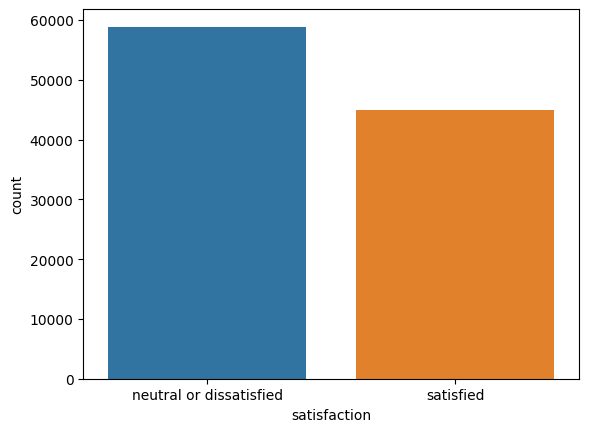

In [10]:
ax = sns.countplot(x="satisfaction", data=df_train)

In [11]:
numerics = ['int64','float64']

train_con_col = df_train.select_dtypes(include = numerics).columns
train_cat_col = df_train.select_dtypes(include = "object").columns
test_con_col = df_test.select_dtypes(include = numerics).columns
test_cat_col = df_test.select_dtypes(include = "object").columns

DATA VISUALIZATION

In [ ]:
fig, axs = plt.subplots(9, 2, figsize=(20,50))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df_train,x=df_train[f],kde=True)
    ax.set_title('Feature:'+ f)

To see more clear in delay features, the distribution plot used:

In [ ]:
sns.distplot(df_train['Arrival Delay in Minutes'])

In [ ]:
sns.distplot(df_train['Departure Delay in Minutes'])

In [15]:
fig, axs = plt.subplots(6, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_train,y=df_train[f])

It can be seeing that the delay time minutes exists so many outliers.

Generally, passenger satisfy with the baggage handling and inflight service where the score ranges from 3 to 5 while others mainly stay within 2 to 4 scores.

For more further analysis, focusing on the satisfaction,

one more categorical variable added in barplot to see if the key relation appear.

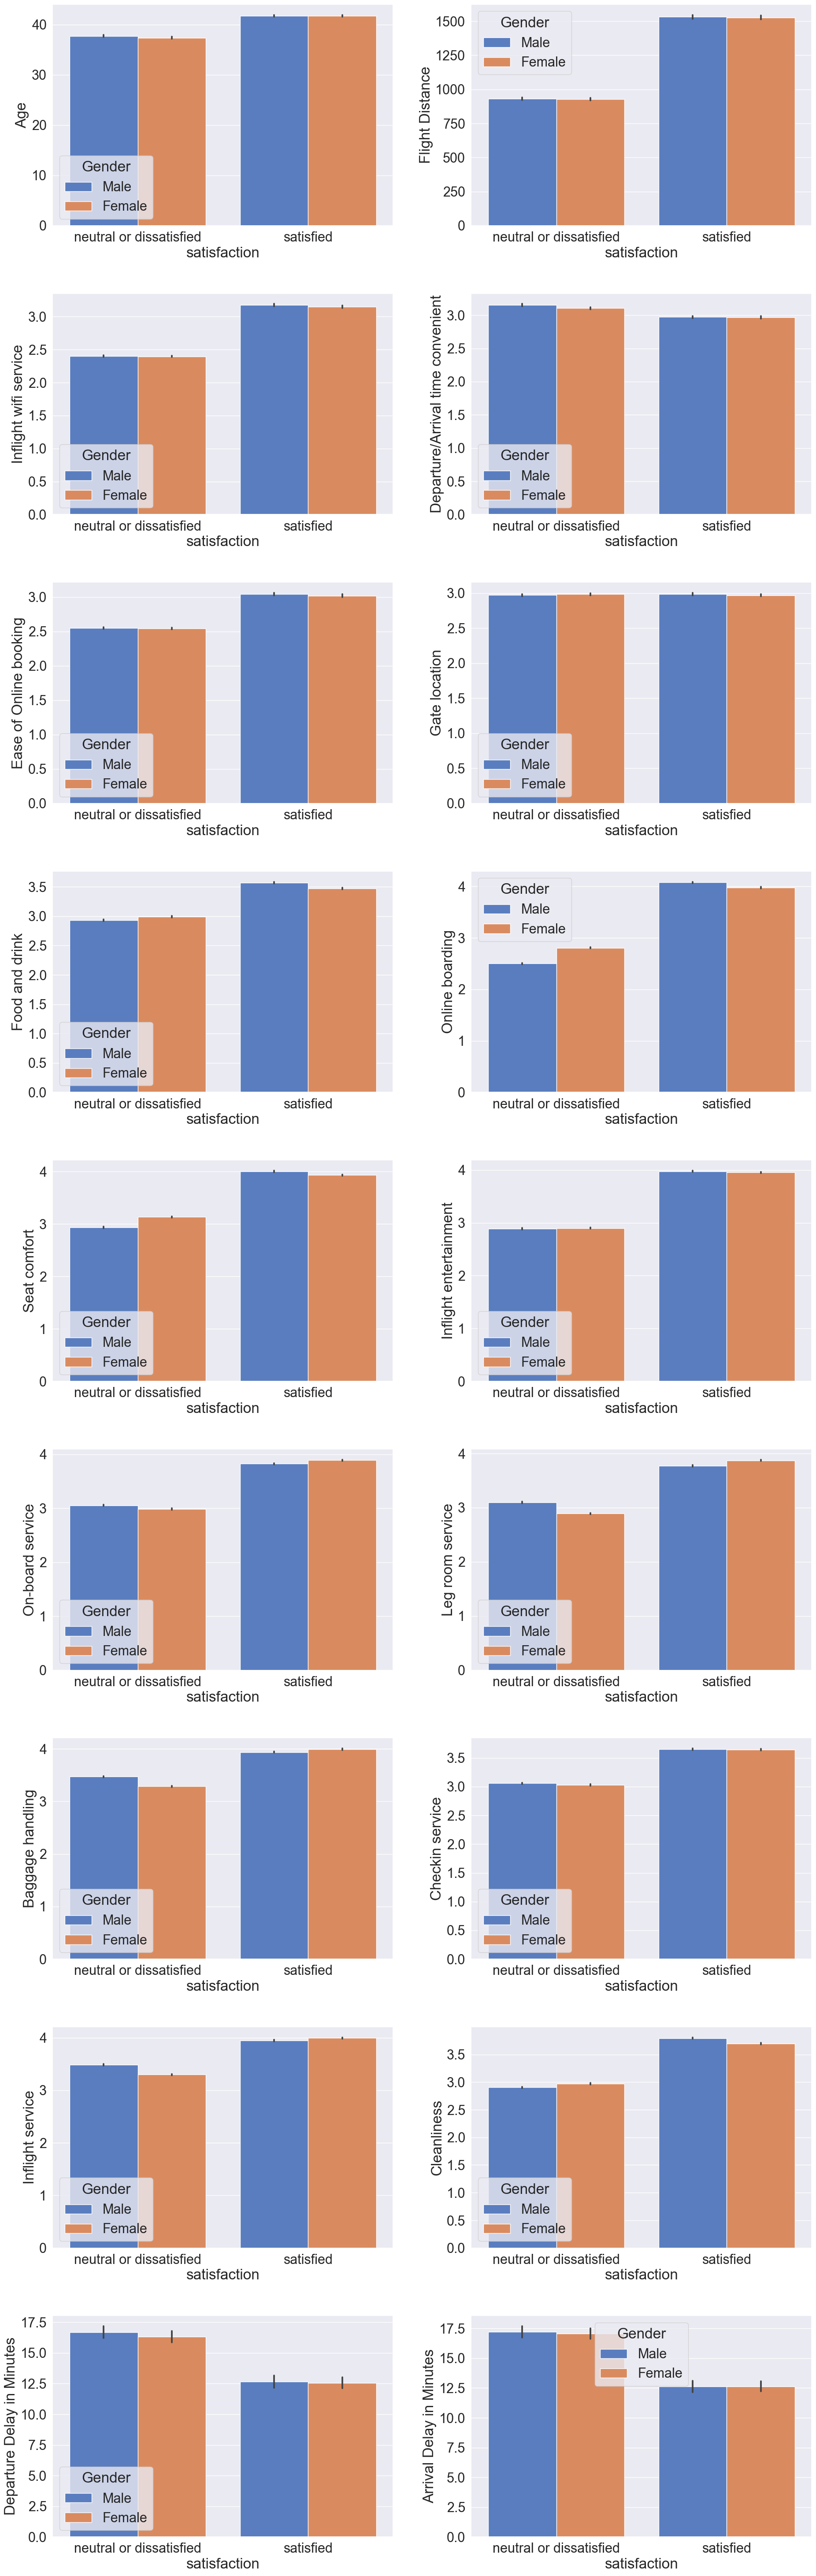

In [ ]:
def detail_barplot(category):
    fig, axs = plt.subplots(9, 2, figsize=(20, 60))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_train)

detail_barplot("Gender")


Based on the result for gender,

the long flight distance make them more likely to satisfy the trip.

But in average of delay time, they may not satisfy when time is 12.5 mins above.

Between the male and female, there are no significant patterns.

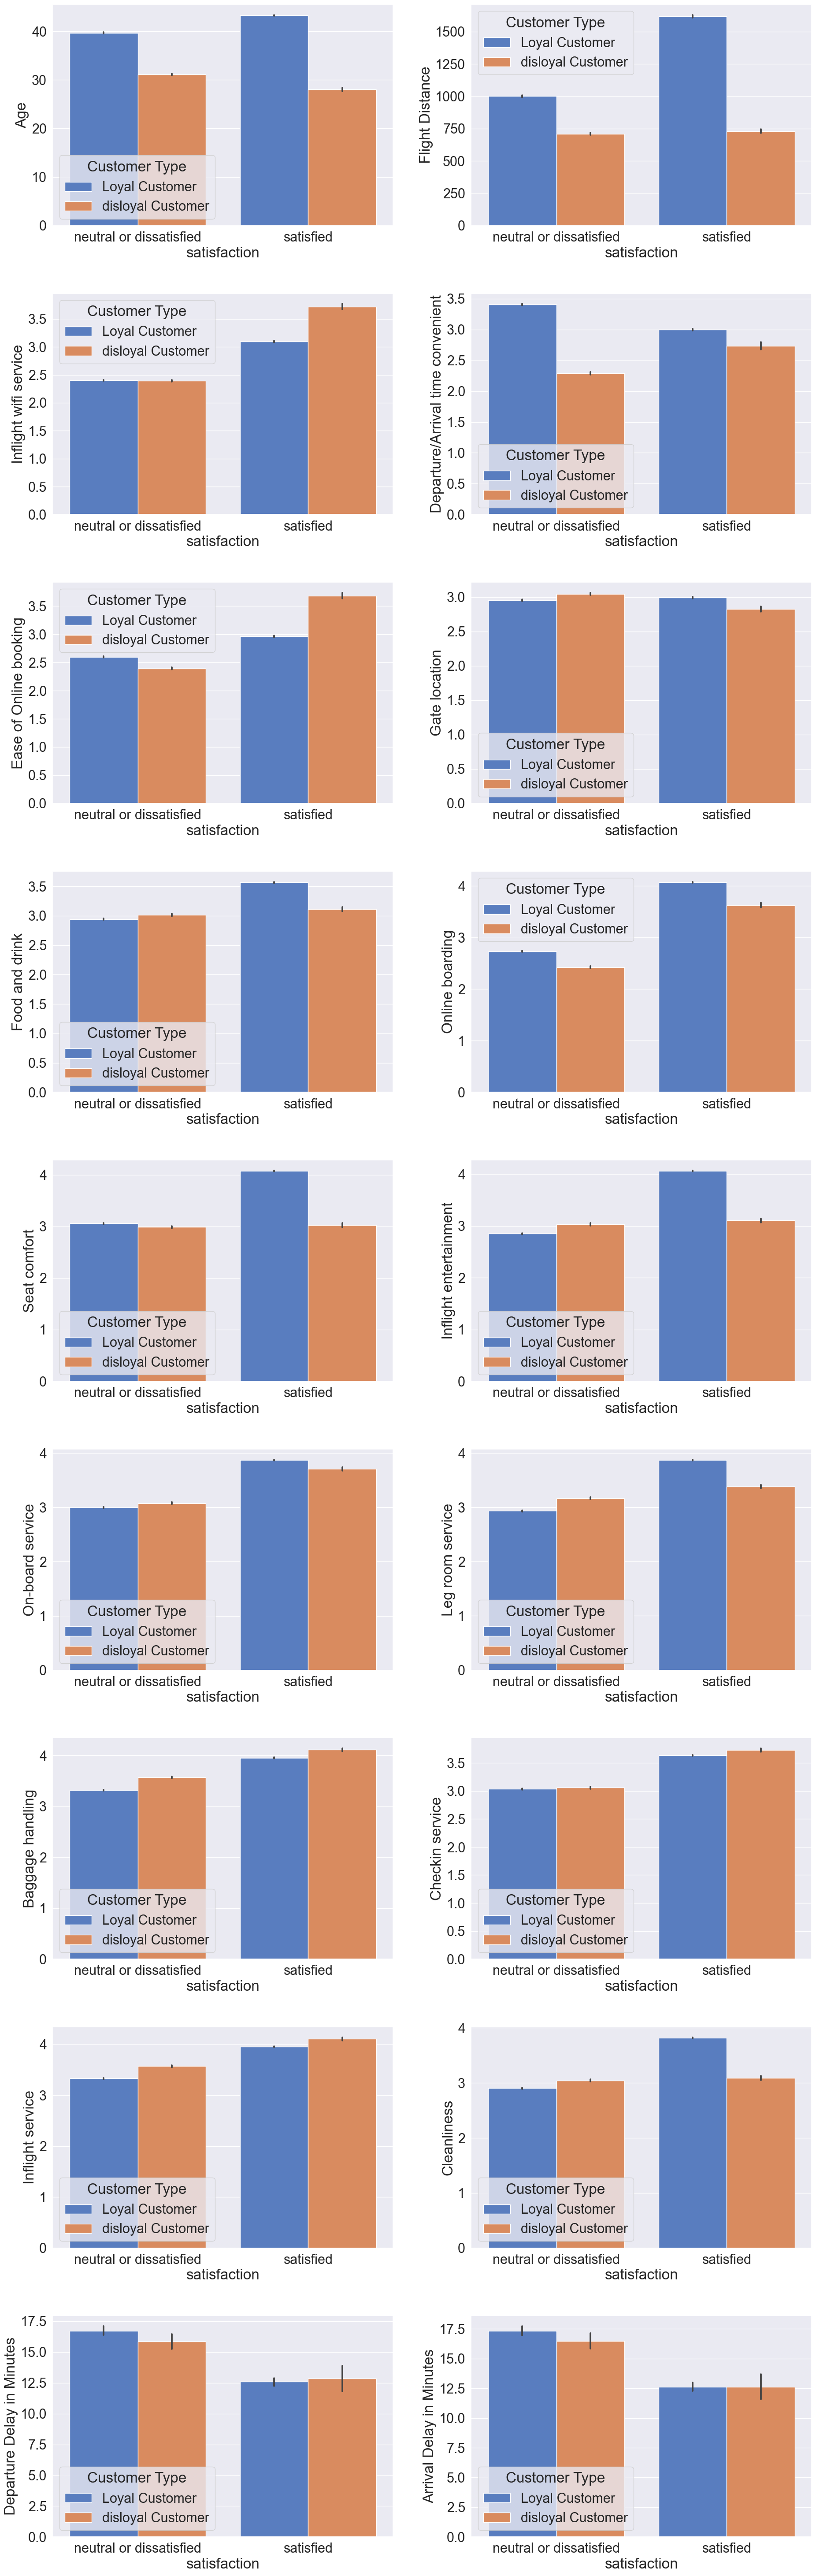

In [17]:
detail_barplot("Customer Type")

For loyal customer:

Age around 40
Satisfy on high flight distance,seat comfort, inflight entertainment, cleanliness
For disloyal customer:

Age around 30
Satisfy on Inflight wifi service, ease of online booking
Again, they generally feel neutral or dissatisfied when the delay time minutes is 12.5 or above

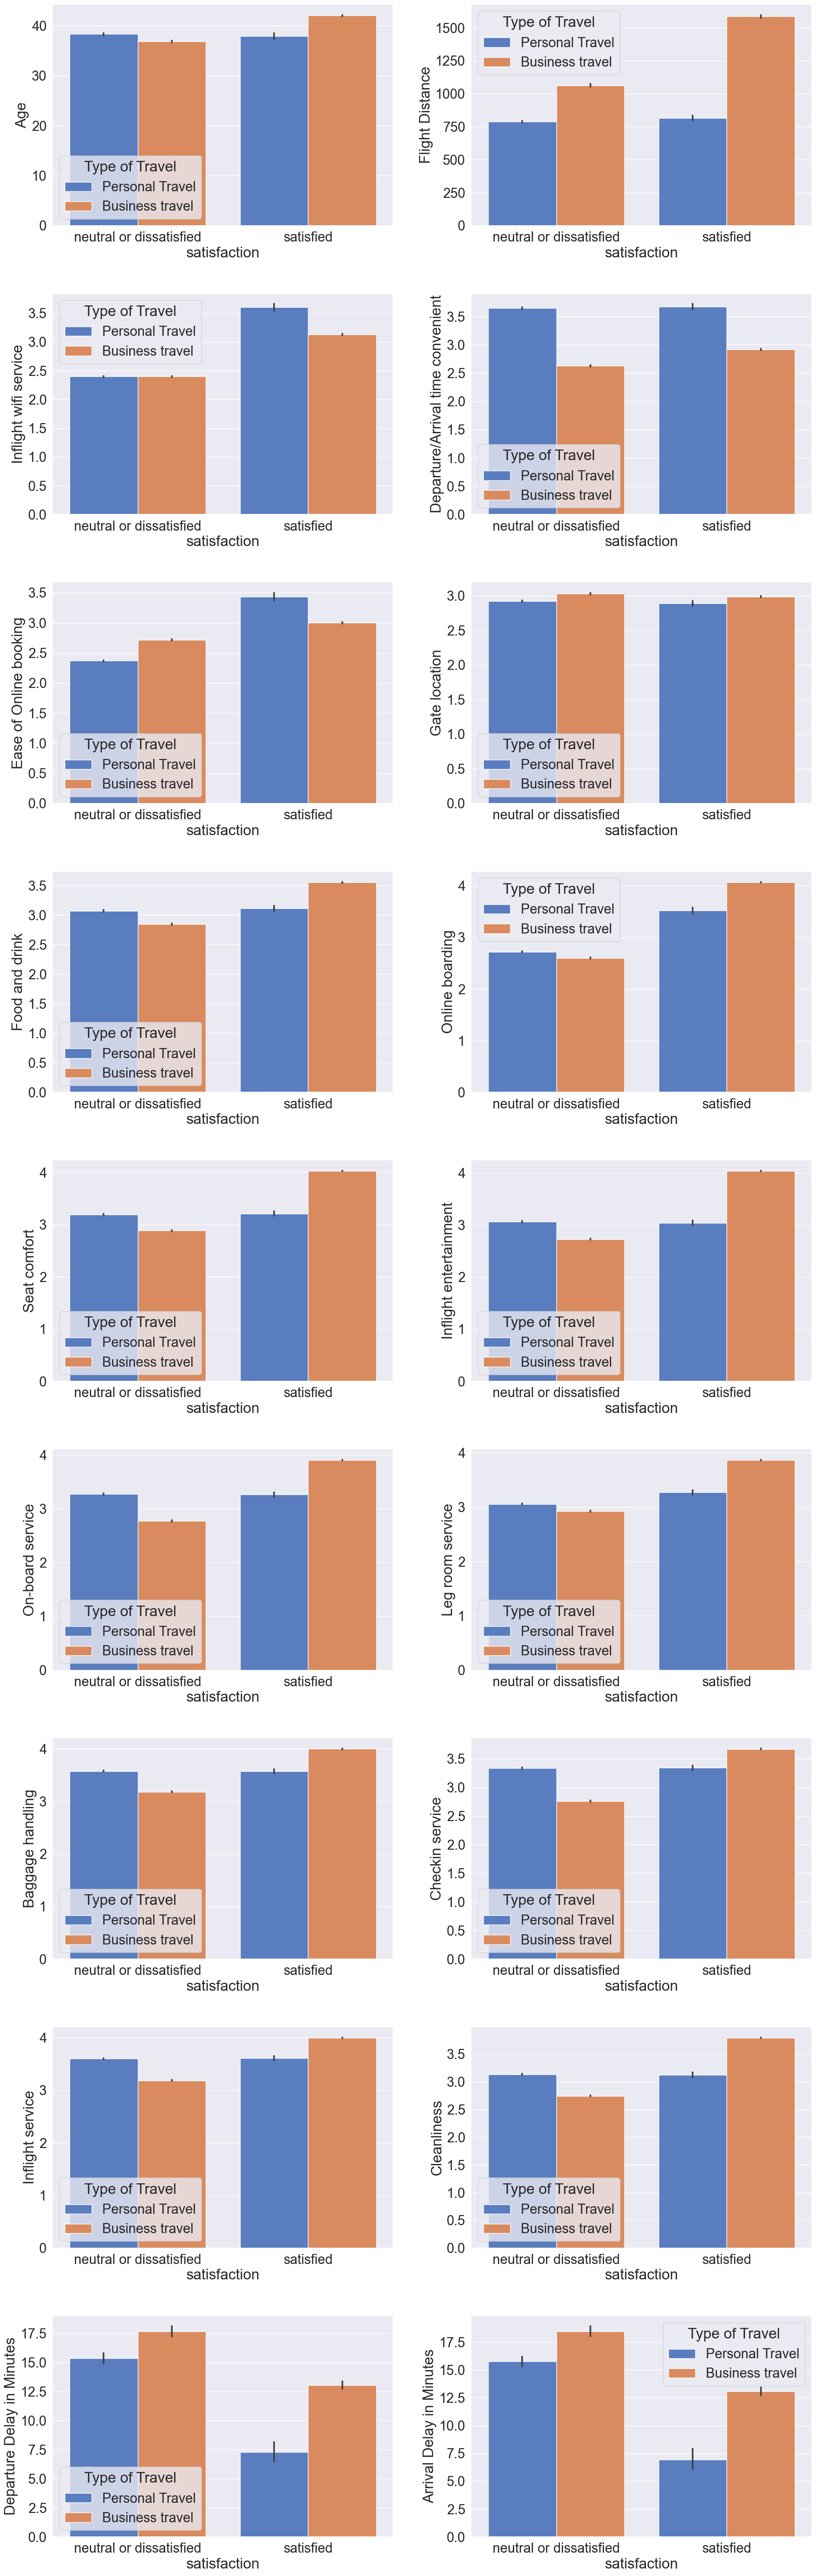

In [ ]:
detail_barplot("Type of Travel")

For personal travel:

satisfy on inflight wifi services, ease of online booking

Average of delay time is 7.5 minutes for satisfied group

For business travel:

satisfy on flight distance, online boarding, seat comfort, inflight entertainment, on-board service, cleanliness

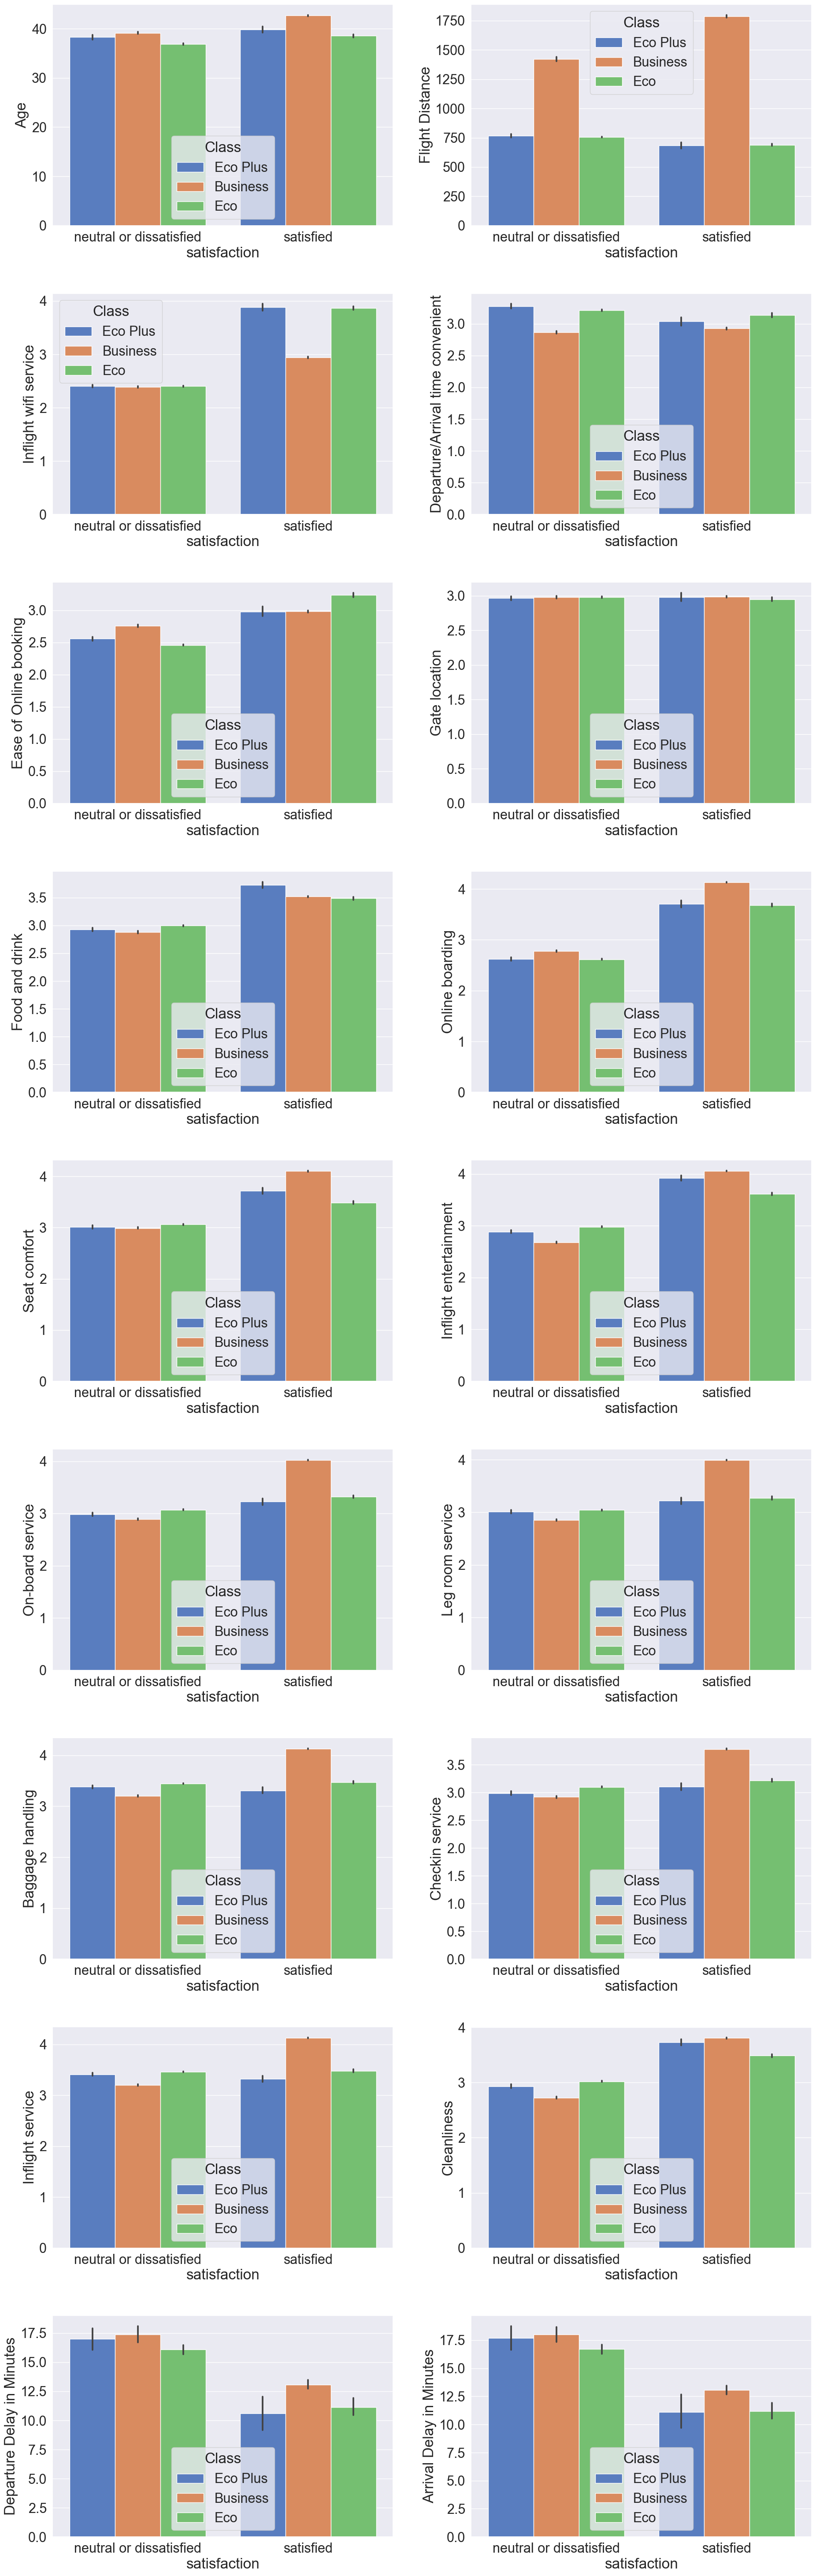

In [ ]:
detail_barplot("Class")

For Business class: Satisfy on high flight distance General flight service score is higher than other class as it is a business class Inflight wifi service is slight lower

For other classes, no any obvious findings found.

To conclude..
👏Good to see no any relatively high neutral or dissatisfied scores in each category of flight experience.

Furthermore, the passengers are more likely acceptable for delay around 12.5 mins or below.

Great🙌🙌, the highest test accuracy can achieve 96%.

Overall, the tree-based classifier out perform than the others.

It is worth to check which factors affect the most from them.

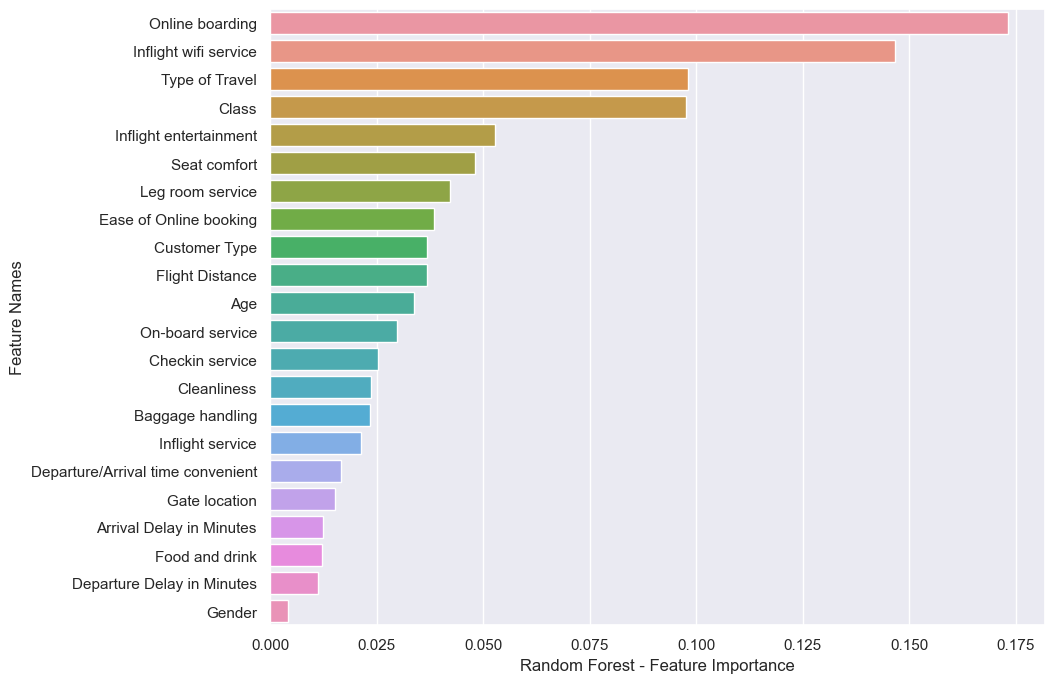

In [ ]:
feature_importance = clf_list[0].feature_importances_
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(rf_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('Random Forest - Feature Importance')
plt.ylabel('Feature Names')
plt.show()